In [3]:
import sys, os
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pydub
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn as nn
from datasets import *
#import torchaudio
#from torchaudio import transforms
import h5py as hf

In [7]:
lim = 10
x = torch.linspace(-lim,lim,1000)
x.size()

torch.Size([1000])

In [8]:
t = torch.tanh(x)
y1 = np.arctanh(t.numpy())
y2 = util.atanh(t).numpy() + 1
x = x.numpy()

C:\Users\anwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


<IPython.core.display.Javascript object>


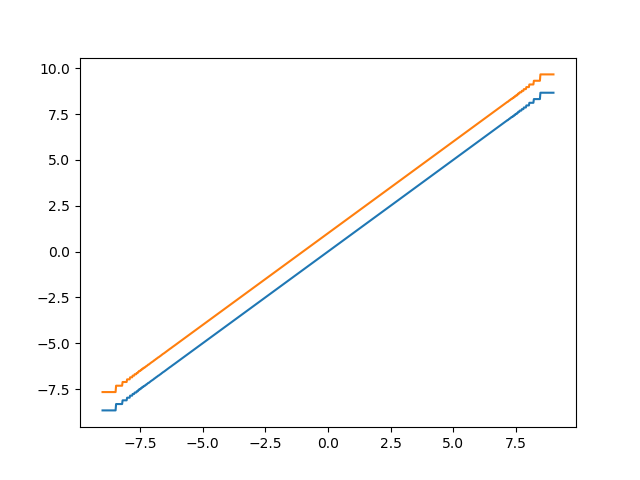

In [9]:
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)

In [21]:
torch.arctanh

AttributeError: module 'torch' has no attribute 'arctanh'

In [5]:
dataset = MusicNet_Dataset('/home/fleeb/workspace/ml_datasets/audio/musicnet/musicnet.h5', hop=1000)

OSError: Unable to open file (unable to open file: name = '/home/fleeb/workspace/ml_datasets/audio/musicnet/musicnet.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
dataset._lens[:3], dataset._ids[:3] 

(array([446, 250, 443]), array(['id_1727', 'id_1728', 'id_1729'], dtype='<U7'))

In [3]:
x,y = dataset[0]
len(x), y

(44100, 2)

In [7]:
with hf.File('/home/fleeb/workspace/ml_datasets/audio/musicnet/musicnet.h5', 'r') as f:
    a = f['id_1727'].attrs['label']
    b = f['id_1727']['data'].value

In [8]:
a, b.shape

(2, (19715328,))

In [9]:
b.shape[0] // 44100

447

In [2]:
t, fs = torchaudio.load('example.mp3', normalization=True)
t.size(), fs

(torch.Size([3186432, 2]), 48000)

In [13]:
torchaudio.transforms.MEL2?

In [12]:
spec = torchaudio.transforms.MEL2()
spec(t).size()

TypeError: stft(): argument 'normalized' (position 5) must be bool, not Tensor

In [16]:
sig = transforms.LC2CL()(t)  # (n, c) -> (c, n)
spec_mel = transforms.MEL2(fs)(sig)  # (c, l, m)

TypeError: stft(): argument 'normalized' (position 5) must be bool, not Tensor

In [4]:
f = hf.File('/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0000.h5', 'r')
list(f.keys())

['wav']

In [5]:
f['wav'].shape

(11726221,)

In [6]:
a = f['wav'].value

In [7]:
list(f.attrs.keys())

['name', 'gid', 'mid']

In [8]:
f.attrs['gid'], f.attrs['mid']

(7, 8)

In [9]:
f.attrs['name']

'Hang Ups Want You - Otis McDonald (No Copyright Music)'

In [10]:
f.close()

In [11]:
a.size / 44100

265.9007029478458

<IPython.core.display.Javascript object>


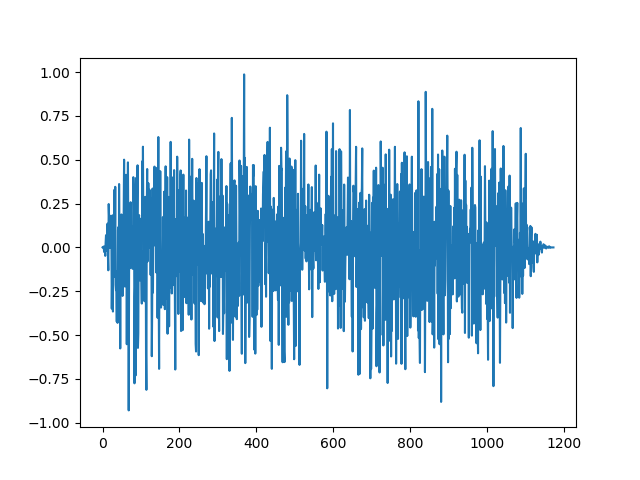

In [12]:
plt.figure()
plt.plot(a[::10000])